In [1]:
from networkx.readwrite import json_graph
import networkx as nx
import json
import matplotlib.pyplot as plt
import community as community_louvain

In [2]:
with open("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/Graphs/2016/Graph.json", 'rt') as gr:
    g = json.load(gr)

In [3]:
G = json_graph.node_link_graph(g)

In [4]:
print(type(G))

<class 'networkx.classes.graph.Graph'>


In [5]:
# Print number of nodes and edges

In [6]:
print("Number of Nodes: ", len(G.nodes()))
print("Number of Edges: ", len(G.edges()))

Number of Nodes:  2552
Number of Edges:  1121767


In [7]:
#Degree calculation

In [8]:
for node_temp in G.nodes():
    wt = 0
    deg = 0
    for nbr, eattr in G.adj[node_temp].items():
        wt = wt + eattr['weight']
        deg += 1
    G.nodes[node_temp]['deg_wt'] = wt
    G.nodes[node_temp]['deg'] = deg

In [9]:
#Degree distrivution

Text(0, 0.5, 'Frequency')

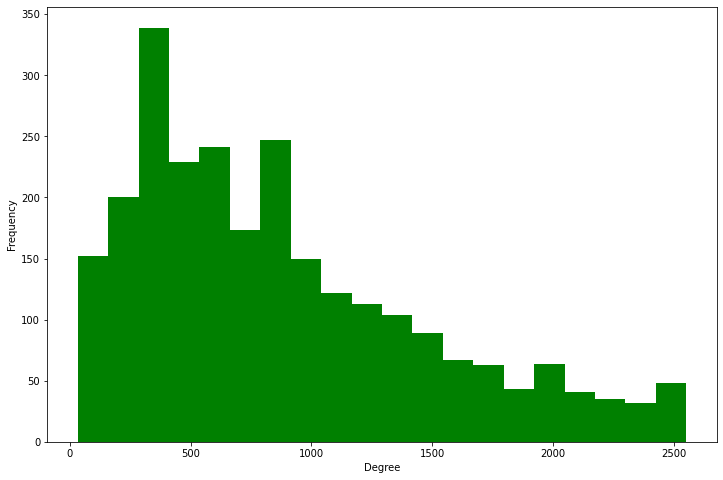

In [10]:
degree_freq = []
for nod in G.nodes:
    degree_freq.append(G.nodes[nod]['deg'])

degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8))
plt.hist(degree_freq, color='green', bins=20)
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [11]:
# Weight Distribution

Text(0, 0.5, 'Frequency')

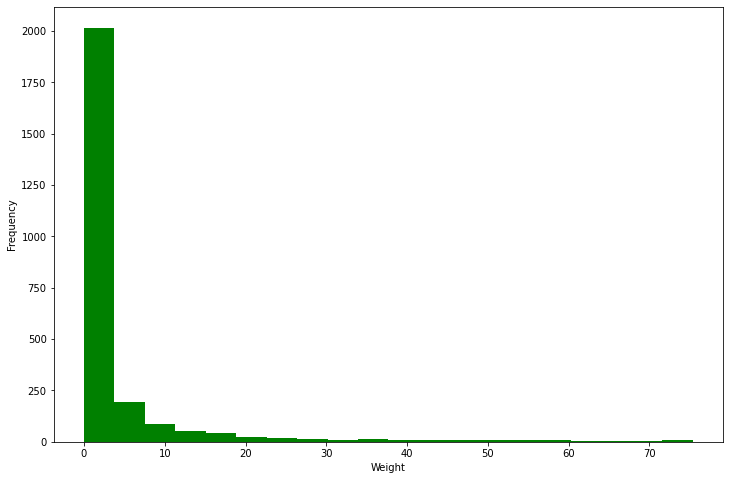

In [12]:
weight_freq = []
for nod in G.nodes:
    weight_freq.append(G.nodes[nod]['deg_wt'])

wt = range(len(weight_freq))
plt.figure(figsize=(12, 8))
plt.hist(weight_freq, color='green', bins=20)
plt.xlabel('Weight')
plt.ylabel('Frequency')

In [13]:
# Degree statistics

In [14]:
# Average degree
print(sum(degree_freq)/len(G.nodes))
print(min(degree_freq))
print(max(degree_freq))

879.1277429467085
33
2551


In [15]:
# Weight Statistics
print(sum(weight_freq)/len(G.nodes))
print(min(weight_freq))
print(max(weight_freq))

4.380423599136089
0.002203613926840018
75.37530693193897


In [16]:
# sort nodes based on degree

In [17]:
degree_freq = {}
for nod in G.nodes:
    degree_freq[nod] = G.nodes[nod]['deg']
sorted_degree = dict(sorted(degree_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_degree)

{'parent': 2551, 'document': 2551, 'window': 2551, 'location': 2551, 'top': 2551, 'var': 2551, 'self': 2551, 'name': 2551, 'opener': 2549, 'frames': 2549, 'init': 2547, 'null': 2545, 'length': 2536, 'push': 2526, 'prototype': 2519, 'undefined': 2504, 'type': 2501, 'Math': 2500, 'width': 2495, 'replace': 2493, 'createElement': 2490, 'navigator': 2489, 'id': 2487, 'setTimeout': 2487, 'height': 2486, 'call': 2484, 'function': 2483, 'Date': 2475, 'toString': 2473, 'object': 2469, 'Array': 2467, 'addEventListener': 2467, 'body': 2465, 'src': 2465, 'style': 2465, 'join': 2464, 'string': 2462, 'match': 2460, 'userAgent': 2460, 'hasOwnProperty': 2452, 'href': 2452, 'arguments': 2447, 'appendChild': 2444, 'slice': 2443, 'value': 2439, 'data': 2438, 'void': 2434, 'Object': 2433, 'apply': 2424, 'in': 2414, 'console': 2412, 'documentElement': 2412, 'load': 2394, 'String': 2389, 'number': 2383, 'log': 2377, 'parentNode': 2371, 'getElementsByTagName': 2371, 'JSON': 2370, 'error': 2365, 'splice': 236

In [18]:
# sort nodes based on weight

In [19]:
weight_freq = {}
for nod in G.nodes:
    weight_freq[nod] = G.nodes[nod]['deg_wt']
sorted_weight = dict(sorted(weight_freq.items(), key=lambda item: item[1], reverse=True))
print(sorted_weight)

{'document': 75.37530693193897, 'var': 75.37115154567691, 'window': 75.35572624818901, 'location': 75.35106717874368, 'name': 75.32021658376789, 'top': 75.29950261285563, 'parent': 74.11483976578641, 'self': 74.05534218976173, 'opener': 74.0367688723783, 'frames': 74.0367688723783, 'length': 71.83737329219822, 'init': 71.38607315998148, 'null': 70.35358559466019, 'src': 70.02770257507929, 'createElement': 69.33551596046017, 'push': 65.80797078637487, 'type': 64.52691557010615, 'replace': 64.14770509349637, 'getElementsByTagName': 64.07888937858118, 'Date': 62.98533022728746, 'Math': 62.15060127180035, 'parentNode': 60.50960146068158, 'id': 60.450985330227624, 'body': 60.050934961909284, 'appendChild': 60.026506327520416, 'undefined': 59.89857079896779, 'join': 59.15280488572706, 'setTimeout': 58.828810678083904, 'call': 57.094944280048225, 'style': 56.722155764024514, 'navigator': 56.382043694516426, 'toString': 54.94390228546264, 'height': 54.63552225650093, 'addEventListener': 54.565

In [20]:
# Check whether the graph is connected

In [21]:
nx.is_connected(G)

True

In [22]:
# Clustering Coefficient

In [23]:
nx.average_clustering(G)

0.8183416770926476

In [24]:
# average_shortest_path_length

In [25]:
nx.average_shortest_path_length(G)

1.6553791677982326

In [26]:
#Lovain methof

In [27]:
partition = community_louvain.best_partition(G, resolution=0.88, weight='weight')

In [28]:
# number of partinions

In [29]:
num_of_partitions = len(set(partition.values()))
print(num_of_partitions)

9


In [30]:
api_hash_fract = {}
for key, value in partition.items():
    api_hash_fract[key] = value
louvain_clusters = {}
for i in range(num_of_partitions):
    clust = []
    for key, value in api_hash_fract.items():
        if value == i:
            clust.append(key)
    louvain_clusters[i] = clust
for i in range(num_of_partitions):
    print(len(louvain_clusters[i]))

81
4
148
1104
22
129
838
149
77


In [31]:
with open("Lovain_clusters.json", 'w') as l:
    json.dump(louvain_clusters,l, indent=4)
